Qs

Monday morning (Explore) / afternoon Teusday Start answering
* What is the difference in GE profile between Tumoral and Normal
    * Are there any expression of interest (different between normal and tumoral?)
        - Does the mean/mode of the Tumoral and Normal compare, what are the differences?
        - Possible Bar graph from mean/mode from tumoral and Normal?
    * What is the overall differences between expression within the groups Tumoral/Normal?
        - Check if there are any outliers (possible high values per sample)
        - Check if something is overexpressed (higher than mean of normal) is this overall in tumoral, or only spiked in one sample
        - Possible Normalized line graph (sample to samplem, tumoral expression - control normal expression)
        - come up with maybe another to do visualize this?
    * Are there any genes correlated with eachtother (possible same pathway)
        - Check corraltion matrix on numericals
        - Pick 5 ten of correlated Genes/Probes
        - (Optionally) We can check some papers if really correlated

>> Might possible need some cleaning here?
    Are the genes between data sets the same?

Wednesday / Thursday
* What are the differences between to different types of Tumoral datasets?  
    * Are the interesting picks the same between the different sets?

Thursday Morning
Prep the slides
- Dogma
- Why, Data science >3 min
- Grpahs >3 min

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, iqr

In [2]:
main = pd.read_csv('./Raw/Prostate_GSE46602.csv')
main.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,136,tumoral,8.767514,4.092134,6.006339,6.091951,2.738641,7.707960,6.702969,5.203349,...,13.852908,13.854510,14.953006,14.824910,3.710845,2.493435,2.913242,2.360155,2.758725,2.779035
1,137,tumoral,9.177852,5.688045,5.599253,5.943833,2.667376,6.737484,7.336429,6.246692,...,13.784316,13.776588,14.944678,14.798245,3.840439,2.452855,2.657462,2.480106,2.811486,3.098742
2,138,tumoral,8.415823,4.579540,5.562391,6.185697,2.747484,6.961582,6.809795,7.158062,...,13.833406,13.853554,14.929317,14.749283,3.960969,2.593110,2.839218,2.483863,2.939876,2.761388
3,139,tumoral,8.943121,6.577537,5.850425,5.846352,2.429107,6.492797,7.594337,6.060994,...,13.601130,13.604113,14.927910,14.753407,3.821295,2.629036,2.798198,2.487149,2.652175,2.600322
4,141,tumoral,8.658734,4.624722,6.882949,5.880421,2.517857,7.519646,6.840436,6.290670,...,13.961861,13.933318,14.994563,14.803339,3.990229,2.862215,2.766505,2.229823,2.630706,2.588111


In [233]:
main.head(100)

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,136,tumoral,8.767514,4.092134,6.006339,6.091951,2.738641,7.707960,6.702969,5.203349,...,13.852908,13.854510,14.953006,14.824910,3.710845,2.493435,2.913242,2.360155,2.758725,2.779035
1,137,tumoral,9.177852,5.688045,5.599253,5.943833,2.667376,6.737484,7.336429,6.246692,...,13.784316,13.776588,14.944678,14.798245,3.840439,2.452855,2.657462,2.480106,2.811486,3.098742
2,138,tumoral,8.415823,4.579540,5.562391,6.185697,2.747484,6.961582,6.809795,7.158062,...,13.833406,13.853554,14.929317,14.749283,3.960969,2.593110,2.839218,2.483863,2.939876,2.761388
3,139,tumoral,8.943121,6.577537,5.850425,5.846352,2.429107,6.492797,7.594337,6.060994,...,13.601130,13.604113,14.927910,14.753407,3.821295,2.629036,2.798198,2.487149,2.652175,2.600322
4,141,tumoral,8.658734,4.624722,6.882949,5.880421,2.517857,7.519646,6.840436,6.290670,...,13.961861,13.933318,14.994563,14.803339,3.990229,2.862215,2.766505,2.229823,2.630706,2.588111
5,142,tumoral,8.297914,4.978066,5.369657,5.498116,2.676784,7.333801,6.927956,6.575115,...,13.859228,13.845100,14.978770,14.803339,3.993063,2.405645,2.756530,2.207816,2.583021,2.776917
6,143,tumoral,8.676087,4.812014,6.399976,6.270558,2.826762,7.847527,8.206171,5.750945,...,13.812811,13.797140,14.936544,14.738962,4.097893,2.466704,3.119031,2.226913,2.776876,3.135864
7,144,tumoral,8.754139,5.452682,5.572150,6.229390,2.794555,7.494360,7.316815,5.909430,...,13.904647,13.921528,14.961571,14.803339,3.972051,2.894349,2.909141,2.363241,2.751286,3.015182
8,145,tumoral,8.878899,5.207988,6.191102,6.031684,2.551245,7.018430,6.899363,6.425779,...,13.836037,13.788857,14.953006,14.804890,3.388715,2.368443,2.569418,2.313692,2.574694,2.835571
9,146,tumoral,8.904715,5.540052,5.186019,6.049710,2.409490,8.007879,7.173949,5.298159,...,13.913742,13.942921,14.942902,14.803339,3.994194,2.784836,2.866028,2.495489,2.462269,2.906434


In [439]:
#df_genes = df.drop([‘samples’, ‘type’], axis = 1)
df_transformed = main.copy()

# apply quantile transformation to data
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer (output_distribution ='normal')
qt.fit(main[main.columns[2:]])
df_transformed[main.columns[2:]] = qt.transform(main[main.columns[2:]])

C:\Users\timmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (49). n_quantiles is set to n_samples.
  warnings.warn(


In [235]:
melted_df_transformed = df_transformed.melt(id_vars=['samples', 'type'], var_name='gene', value_name='expression').sort_values('type')

melted_df_transformed

,samples,type,gene,expression
2679074,185,normal,AFFX-TrpnX-M_at,-2.036834
863427,184,normal,208194_s_at,5.199338
863428,185,normal,208194_s_at,0.000000
2062311,185,normal,232834_at,0.967422
2062310,184,normal,232834_at,-0.430727
...,...,...,...,...
1041859,160,tumoral,211954_s_at,-0.741594
1041860,161,tumoral,211954_s_at,0.318639
1041861,162,tumoral,211954_s_at,-0.812218
1041855,156,tumoral,211954_s_at,-0.674490


In [366]:
def remove_outliers(df: pd.DataFrame):
    #This function takes as input a dataframe, and iterate through all the columns to remove the outliers using iqr method
    dict_col = {}
    for column in df.columns:
        values = df[column]
        iqr = np.percentile(df[column], 75) - np.percentile(df[column], 25)
        upper_whisker = np.percentile(df[column], 75) + 3 * iqr
        lower_whisker = np.percentile(df[column], 25) - 3 * iqr
        no_outliers = values[(values >= lower_whisker) & (values <= upper_whisker)]
        dict_col[column] = no_outliers
    no_outliers_df = pd.DataFrame(dict_col)
    return no_outliers_df

In [365]:
df_transformed.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,136,tumoral,0.210428,-1.258162,0.318639,0.674490,0.318639,-0.157311,-0.157311,-1.731664,...,-0.488776,-0.374095,-0.430727,0.674490,-0.548522,-0.488776,0.741594,0.157311,0.318639,0.052245
1,137,tumoral,1.150349,1.382994,-0.488776,0.104633,-0.430727,-1.258162,1.054472,0.104633,...,-1.258162,-1.258162,-0.674490,-0.318639,0.318639,-0.610295,-0.610295,0.741594,0.741594,1.258162
2,138,tumoral,-0.674490,-0.430727,-0.741594,0.967422,0.430727,-1.054472,0.104633,2.036834,...,-0.741594,-0.430727,-1.534121,-1.382994,0.548522,0.000000,0.264147,0.812218,1.150349,-0.052245
3,139,tumoral,0.548522,5.199338,0.052245,-0.264147,-1.731664,-1.534121,1.382994,-0.210428,...,-5.199338,-5.199338,-1.731664,-1.258162,0.210428,0.210428,0.052245,0.967422,-0.264147,-0.967422
4,141,tumoral,-0.210428,-0.374095,1.534121,-0.104633,-1.150349,-0.318639,0.157311,0.210428,...,0.430727,0.104633,0.887147,0.026114,0.741594,1.150349,-0.104633,-0.741594,-0.548522,-1.150349


In [368]:
df_transformed_outliers_gone = remove_outliers(df_transformed.drop(['samples', 'type'], axis=1))

In [369]:
df_transformed_outliers_gone.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,0.210428,-1.258162,0.318639,0.674490,0.318639,-0.157311,-0.157311,-1.731664,NaN,-0.610295,...,-0.488776,-0.374095,-0.430727,0.674490,-0.548522,-0.488776,0.741594,0.157311,0.318639,0.052245
1,1.150349,1.382994,-0.488776,0.104633,-0.430727,-1.258162,1.054472,0.104633,-0.741594,-0.548522,...,-1.258162,-1.258162,-0.674490,-0.318639,0.318639,-0.610295,-0.610295,0.741594,0.741594,1.258162
2,-0.674490,-0.430727,-0.741594,0.967422,0.430727,-1.054472,0.104633,2.036834,-1.731664,1.150349,...,-0.741594,-0.430727,-1.534121,-1.382994,0.548522,0.000000,0.264147,0.812218,1.150349,-0.052245
3,0.548522,NaN,0.052245,-0.264147,-1.731664,-1.534121,1.382994,-0.210428,-0.318639,-1.258162,...,NaN,NaN,-1.731664,-1.258162,0.210428,0.210428,0.052245,0.967422,-0.264147,-0.967422
4,-0.210428,-0.374095,1.534121,-0.104633,-1.150349,-0.318639,0.157311,0.210428,0.318639,0.318639,...,0.430727,0.104633,0.887147,0.026114,0.741594,1.150349,-0.104633,-0.741594,-0.548522,-1.150349


In [372]:
main['sample', 'type'].head()

KeyError: ('sample', 'type')

In [386]:
test3 = pd.merge(df_transformed[['samples', 'type']], df_transformed_outliers_gone, right_index=True, left_index=True)
test3.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,136,tumoral,0.210428,-1.258162,0.318639,0.674490,0.318639,-0.157311,-0.157311,-1.731664,...,-0.488776,-0.374095,-0.430727,0.674490,-0.548522,-0.488776,0.741594,0.157311,0.318639,0.052245
1,137,tumoral,1.150349,1.382994,-0.488776,0.104633,-0.430727,-1.258162,1.054472,0.104633,...,-1.258162,-1.258162,-0.674490,-0.318639,0.318639,-0.610295,-0.610295,0.741594,0.741594,1.258162
2,138,tumoral,-0.674490,-0.430727,-0.741594,0.967422,0.430727,-1.054472,0.104633,2.036834,...,-0.741594,-0.430727,-1.534121,-1.382994,0.548522,0.000000,0.264147,0.812218,1.150349,-0.052245
3,139,tumoral,0.548522,NaN,0.052245,-0.264147,-1.731664,-1.534121,1.382994,-0.210428,...,NaN,NaN,-1.731664,-1.258162,0.210428,0.210428,0.052245,0.967422,-0.264147,-0.967422
4,141,tumoral,-0.210428,-0.374095,1.534121,-0.104633,-1.150349,-0.318639,0.157311,0.210428,...,0.430727,0.104633,0.887147,0.026114,0.741594,1.150349,-0.104633,-0.741594,-0.548522,-1.150349


In [377]:
test3_melted = test3.melt(id_vars=['samples', 'type'], var_name='gene', value_name='expression').sort_values('type')

In [380]:
melted_main_df_transformed = main.melt(id_vars=['samples', 'type'], var_name='gene', value_name='expression').sort_values('type')

In [381]:
test = test3_melted.copy()
test.head()
test = test[test['samples'].isin([185, 184, 183, 160, 161, 162])]

test2 = melted_main_df_transformed.copy()
test2.head()
test2 = test2[test2['samples'].isin([185, 184, 183, 160, 161, 162])]


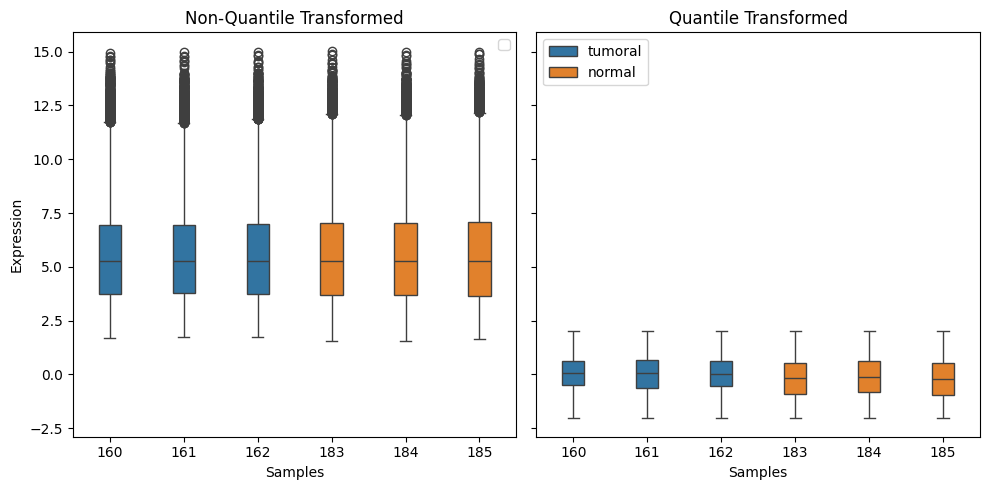

In [382]:
# plot log transformed data on boxplot
f, ax = plt.subplots(1,2,figsize=(10, 5), sharey=True, sharex=True)  # Adjust figure size if needed
ax[1] = sns.boxplot(x='samples', y='expression', hue = 'type',  data=test, width = 0.3, ax=ax[1])
ax[0] = sns.boxplot(x='samples', y='expression', hue = 'type',  data=test2, width = 0.3, ax=ax[0])

ax[0].legend([])
ax[1].legend(loc='upper left')

ax[1].set_title('Quantile Transformed')
ax[0].set_title('Non-Quantile Transformed')

ax[0].set_xlabel('Samples')
ax[1].set_xlabel('Samples')
ax[0].set_ylabel('Expression')

# Show the plot
plt.tight_layout()
plt.show()

In [387]:
test3.head(50)

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,136,tumoral,0.210428,-1.258162,0.318639,0.674490,0.318639,-0.157311,-0.157311,-1.731664,...,-0.488776,-0.374095,-0.430727,0.674490,-0.548522,-0.488776,0.741594,0.157311,0.318639,0.052245
1,137,tumoral,1.150349,1.382994,-0.488776,0.104633,-0.430727,-1.258162,1.054472,0.104633,...,-1.258162,-1.258162,-0.674490,-0.318639,0.318639,-0.610295,-0.610295,0.741594,0.741594,1.258162
2,138,tumoral,-0.674490,-0.430727,-0.741594,0.967422,0.430727,-1.054472,0.104633,2.036834,...,-0.741594,-0.430727,-1.534121,-1.382994,0.548522,0.000000,0.264147,0.812218,1.150349,-0.052245
3,139,tumoral,0.548522,NaN,0.052245,-0.264147,-1.731664,-1.534121,1.382994,-0.210428,...,NaN,NaN,-1.731664,-1.258162,0.210428,0.210428,0.052245,0.967422,-0.264147,-0.967422
4,141,tumoral,-0.210428,-0.374095,1.534121,-0.104633,-1.150349,-0.318639,0.157311,0.210428,...,0.430727,0.104633,0.887147,0.026114,0.741594,1.150349,-0.104633,-0.741594,-0.548522,-1.150349
5,142,tumoral,-0.887147,0.374095,-1.382994,-2.036834,-0.264147,-0.741594,0.318639,0.887147,...,-0.430727,-0.548522,0.642061,0.026114,0.812218,-0.967422,-0.210428,-1.054472,-0.812218,0.000000
6,143,tumoral,-0.104633,0.000000,0.887147,1.731664,0.741594,0.104633,NaN,-0.967422,...,-0.967422,-0.967422,-1.318011,-1.731664,1.534121,-0.548522,1.258162,-0.887147,0.548522,1.731664
7,144,tumoral,0.104633,0.967422,-0.674490,1.150349,0.488776,-0.374095,0.967422,-0.610295,...,-0.264147,-0.052245,0.000000,0.026114,0.674490,1.534121,0.674490,0.210428,0.264147,0.967422
8,145,tumoral,0.430727,0.741594,0.812218,0.318639,-0.967422,-0.887147,0.264147,0.488776,...,-0.674490,-1.054472,-0.430727,0.210428,-1.731664,-1.382994,-1.731664,-0.210428,-0.887147,0.430727
9,146,tumoral,0.488776,1.150349,-2.036834,0.430727,-2.036834,0.548522,0.610295,-1.382994,...,-0.157311,0.157311,-0.812218,0.026114,0.887147,0.967422,0.374095,1.150349,-1.731664,0.610295


In [325]:
melted_df_transformed.head(100)

,samples,type,gene,expression
2679074,185,normal,AFFX-TrpnX-M_at,-2.036834
863427,184,normal,208194_s_at,5.199338
863428,185,normal,208194_s_at,0.000000
2062311,185,normal,232834_at,0.967422
2062310,184,normal,232834_at,-0.430727
...,...,...,...,...
863515,163,normal,208196_x_at,-0.210428
863516,166,normal,208196_x_at,0.610295
863517,176,normal,208196_x_at,-1.054472
863518,177,normal,208196_x_at,-1.258162


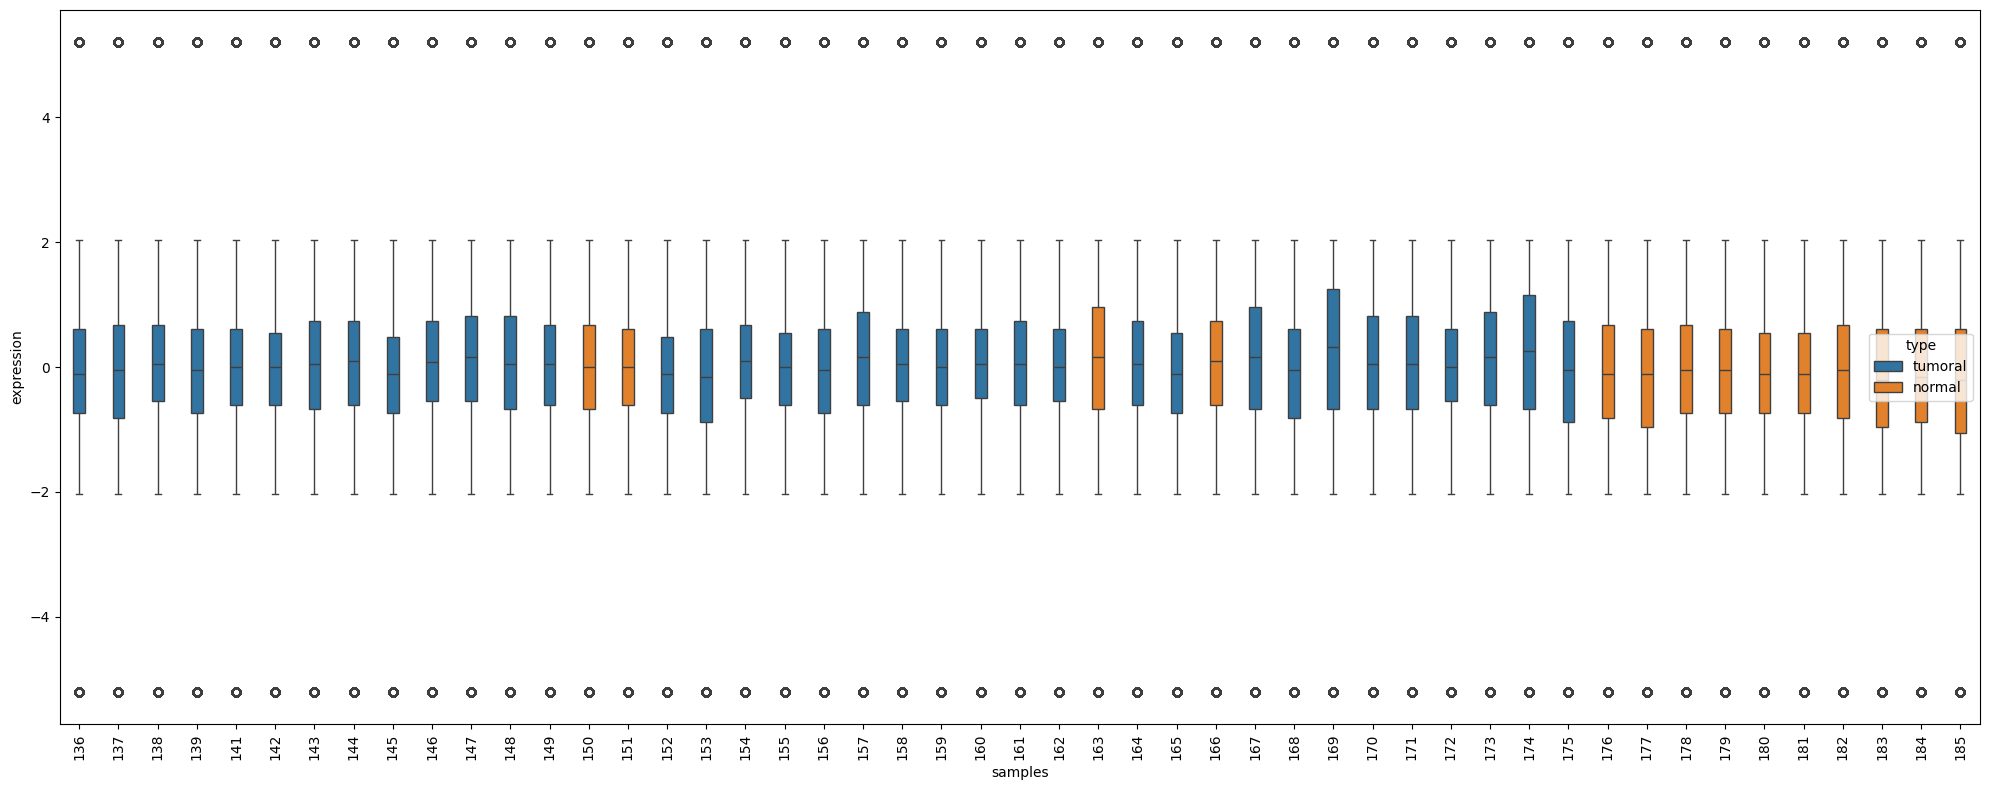

In [240]:
# plot log transformed data on boxplot
plt.figure(figsize=(20, 8))  # Adjust figure size if needed
sns.boxplot(x='samples', y='expression', hue = 'type',  data=melted_df_transformed, width = 0.3)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# Show the plot
plt.tight_layout()
plt.show()

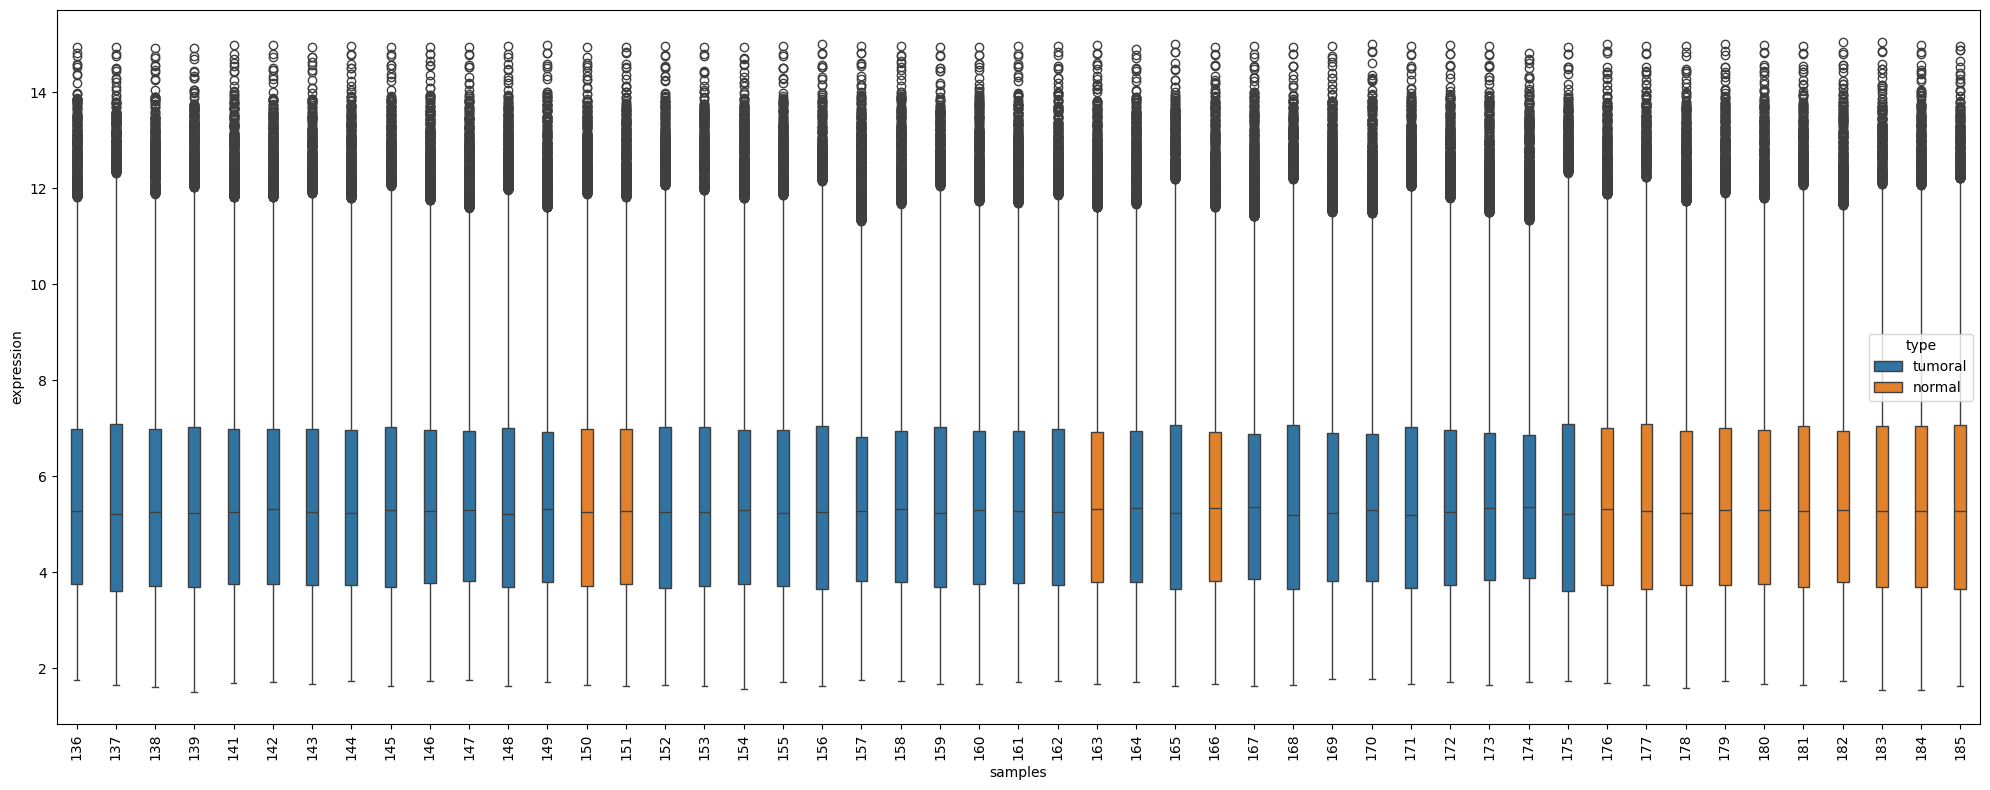

In [239]:
# plot log transformed data on boxplot
plt.figure(figsize=(20, 8))  # Adjust figure size if needed
sns.boxplot(x='samples', y='expression', hue = 'type',  data=melted_main_df_transformed, width = 0.3)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# Show the plot
plt.tight_layout()
plt.show()

In [241]:
df_transformed.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,136,tumoral,0.210428,-1.258162,0.318639,0.674490,0.318639,-0.157311,-0.157311,-1.731664,...,-0.488776,-0.374095,-0.430727,0.674490,-0.548522,-0.488776,0.741594,0.157311,0.318639,0.052245
1,137,tumoral,1.150349,1.382994,-0.488776,0.104633,-0.430727,-1.258162,1.054472,0.104633,...,-1.258162,-1.258162,-0.674490,-0.318639,0.318639,-0.610295,-0.610295,0.741594,0.741594,1.258162
2,138,tumoral,-0.674490,-0.430727,-0.741594,0.967422,0.430727,-1.054472,0.104633,2.036834,...,-0.741594,-0.430727,-1.534121,-1.382994,0.548522,0.000000,0.264147,0.812218,1.150349,-0.052245
3,139,tumoral,0.548522,5.199338,0.052245,-0.264147,-1.731664,-1.534121,1.382994,-0.210428,...,-5.199338,-5.199338,-1.731664,-1.258162,0.210428,0.210428,0.052245,0.967422,-0.264147,-0.967422
4,141,tumoral,-0.210428,-0.374095,1.534121,-0.104633,-1.150349,-0.318639,0.157311,0.210428,...,0.430727,0.104633,0.887147,0.026114,0.741594,1.150349,-0.104633,-0.741594,-0.548522,-1.150349


In [3]:
# Exploring samples/ values
main.shape

main[
    'type'
].value_counts()

# type
# tumoral    35
# normal     14
# Total      49

# list of probes, 54677 total
lst_probes = main.columns

# Get list of limited probes, to test and limit the graphs output
limited_probes = lst_probes[:10]


In [4]:
test = main[lst_probes[1:]]
normal_melted = test[test['type']=='normal'].drop('type', axis=1).melt()
tumoral_melted = test[test['type']=='tumoral'].drop('type', axis=1).melt()

display( normal_melted.describe(), tumoral_melted.describe()) 

,value
count,765450.000000
mean,5.504465
std,2.181128
min,1.534013
25%,3.724641
50%,5.283532
75%,6.990861
max,15.038673


,value
count,1.913625e+06
mean,5.506816e+00
std,2.179134e+00
min,1.509628e+00
25%,3.739062e+00
50%,5.268772e+00
75%,6.971123e+00
max,1.501602e+01


In [5]:
means_df = main[lst_probes[1:]].groupby('type').agg('mean').reset_index()
means_df.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,normal,8.708066,4.693110,6.005189,5.955509,2.681096,8.227662,6.559012,6.228866,5.664531,...,14.027591,14.023472,14.982407,14.833541,3.685464,2.589497,2.747030,2.305990,2.728896,2.679962
1,tumoral,8.721844,4.913984,5.961145,5.963773,2.722313,7.458128,7.006784,6.137731,5.128820,...,13.871778,13.864685,14.954858,14.788984,3.845193,2.601172,2.831173,2.370914,2.732593,2.828968


In [6]:
def calculate_difference(df:pd.DataFrame):
    df2 = df.copy()

    # define Min_values Dict
    min_values = {}
    for col in df2.columns[1:]:
        min_values[col] = df2[col][0] - df2[col][1]

    min_values_df = pd.DataFrame([min_values])
    min_values_df['type'] = 'difference'

    # return new concatted dataframe
    return pd.concat([df2, min_values_df], axis=0)
    

In [7]:
difference_set = calculate_difference(means_df)
difference_set.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,normal,8.708066,4.693110,6.005189,5.955509,2.681096,8.227662,6.559012,6.228866,5.664531,...,14.027591,14.023472,14.982407,14.833541,3.685464,2.589497,2.747030,2.305990,2.728896,2.679962
1,tumoral,8.721844,4.913984,5.961145,5.963773,2.722313,7.458128,7.006784,6.137731,5.128820,...,13.871778,13.864685,14.954858,14.788984,3.845193,2.601172,2.831173,2.370914,2.732593,2.828968
0,difference,-0.013777,-0.220874,0.044044,-0.008264,-0.041217,0.769534,-0.447772,0.091136,0.535711,...,0.155813,0.158786,0.027549,0.044557,-0.159729,-0.011674,-0.084143,-0.064924,-0.003698,-0.149006


In [8]:
difference_set[difference_set['type'] == 'difference'].drop('type', axis=1)

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,-0.013777,-0.220874,0.044044,-0.008264,-0.041217,0.769534,-0.447772,0.091136,0.535711,0.443069,...,0.155813,0.158786,0.027549,0.044557,-0.159729,-0.011674,-0.084143,-0.064924,-0.003698,-0.149006


In [9]:
melt_df = difference_set[difference_set['type'] == 'difference'].drop('type', axis=1).melt()

In [10]:
difference_set[difference_set['type'] == 'difference'].drop('type', axis=1).melt().describe()

,value
count,54675.000000
mean,-0.002351
std,0.395517
min,-3.983162
25%,-0.201374
50%,-0.043734
75%,0.156052
max,4.614752


In [11]:
high_difference_picks = melt_df[abs(melt_df[
    'value'
]) > 4 ]

high_difference_picks.head()

,variable,value
28953,219669_at,4.401163
38405,229151_at,4.243336
54190,33767_at,4.614752


In [12]:
low_difference_picks = melt_df[abs(melt_df[
    'value'
]) < 0.1 ].head(3)

low_difference_picks.head(3)

,variable,value
0,1007_s_at,-0.013777
2,117_at,0.044044
3,121_at,-0.008264


In [13]:
merge = pd.concat([high_difference_picks, low_difference_picks])
merge.head(6)

,variable,value
28953,219669_at,4.401163
38405,229151_at,4.243336
54190,33767_at,4.614752
0,1007_s_at,-0.013777
2,117_at,0.044044
3,121_at,-0.008264


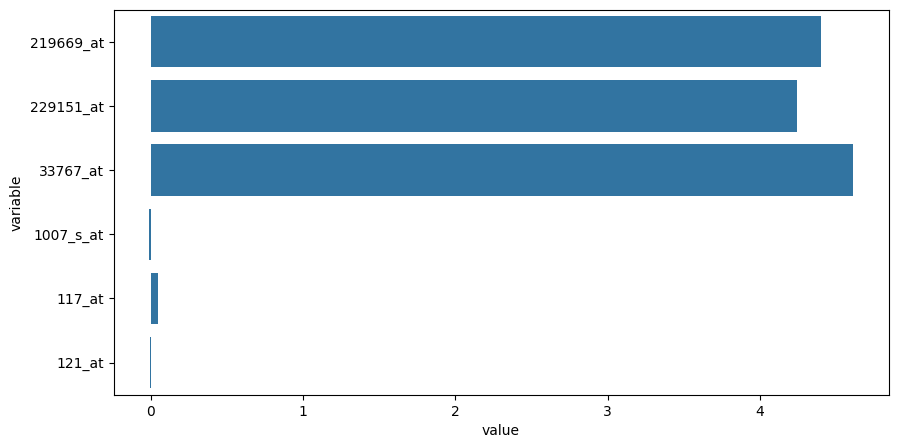

In [14]:
f, ax = plt.subplots(1,1, figsize=(10,5))
ax = sns.barplot(x=merge['value'], y=merge['variable'])

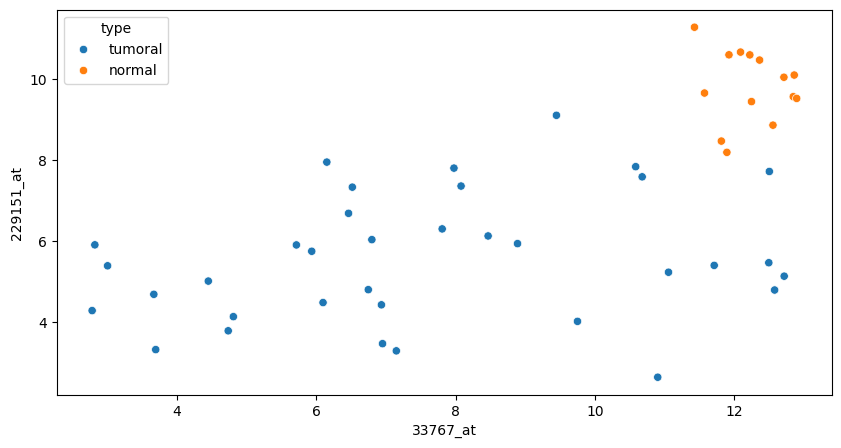

In [15]:
main[['type', '229151_at', '33767_at']].head(1)

f, ax = plt.subplots(1,1, figsize=(10,5))
ax = sns.scatterplot(x=main['33767_at'], y=main['229151_at'], hue=main['type'])

In [16]:
sted_df = main[lst_probes[1:]].groupby('type').std().reset_index()
sted_df.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,normal,0.439745,0.328514,0.411280,0.636255,0.172454,0.395544,0.433748,0.529402,1.306055,...,0.091034,0.097715,0.030916,0.033919,0.266320,0.234681,0.209205,0.230389,0.259391,0.233892
1,tumoral,0.400288,0.660119,0.728214,0.222412,0.166339,0.603780,0.455198,0.560032,1.257369,...,0.093068,0.099449,0.034191,0.034741,0.211229,0.180867,0.174331,0.144325,0.189546,0.186215


In [388]:
sted_df_melt = test3[test3['type'] == 'tumoral'].drop(['type', 'samples'], axis=1).melt()
sted_df_melt

,variable,value
0,1007_s_at,0.210428
1,1007_s_at,1.150349
2,1007_s_at,-0.674490
3,1007_s_at,0.548522
4,1007_s_at,-0.210428
...,...,...
1913620,AFFX-TrpnX-M_at,0.318639
1913621,AFFX-TrpnX-M_at,-1.258162
1913622,AFFX-TrpnX-M_at,1.054472
1913623,AFFX-TrpnX-M_at,0.548522


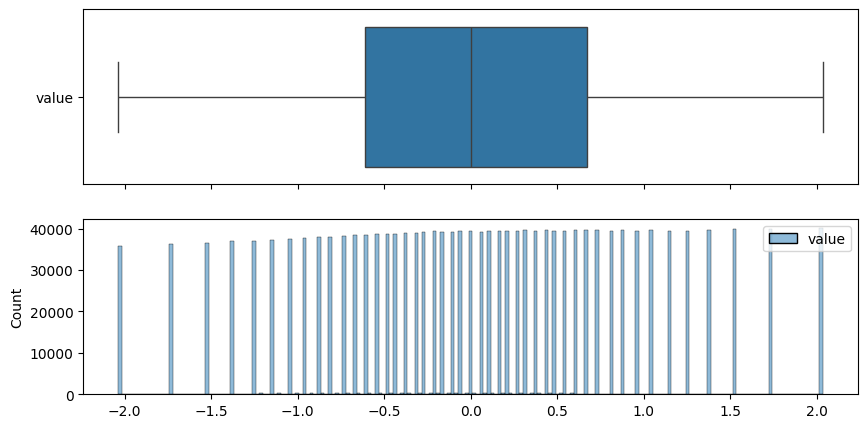

In [389]:
f, ax  = plt.subplots(2,1,figsize=(10,5), sharex=True)

ax[0] = sns.boxplot(sted_df_melt, ax=ax[0], orient='h')
ax[1] = sns.histplot(sted_df_melt, ax=ax[1])

In [198]:
list_of_stable_genes = sted_df_melt[sted_df_melt['value']<5]['variable'].to_list()

In [138]:
new_Sted_melt = sted_df_melt[sted_df_melt['variable'].isin(list_of_stable_genes)]
new_Sted_melt.head()

,variable,value
0,1007_s_at,0.400288
1,1053_at,0.660119
2,117_at,0.728214
3,121_at,0.222412
4,1255_g_at,0.166339


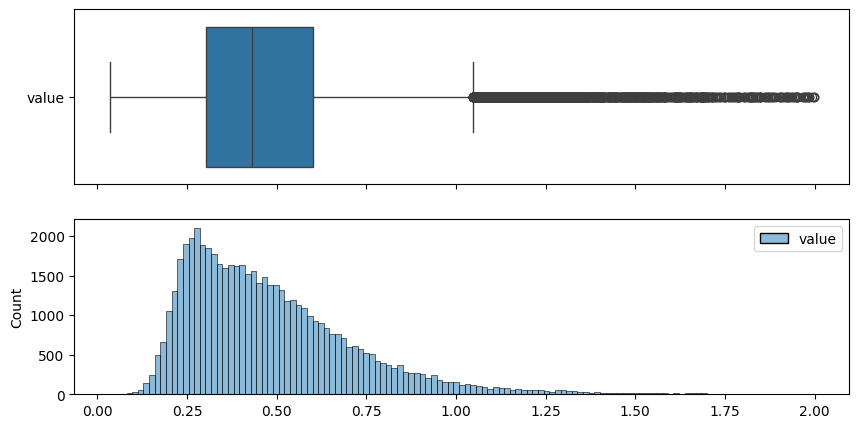

In [139]:
f, ax  = plt.subplots(2,1,figsize=(10,5), sharex=True)

ax[0] = sns.boxplot(new_Sted_melt, ax=ax[0], orient='h')
ax[1] = sns.histplot(new_Sted_melt, ax=ax[1])

In [98]:
list_of_stable_genes

['1405_i_at',
 '1552365_at',
 '1552367_a_at',
 '1552389_at',
 '1552390_a_at',
 '1552455_at',
 '1552457_a_at',
 '1552463_at',
 '1552532_a_at',
 '1552673_at',
 '1552682_a_at',
 '1552701_a_at',
 '1552735_at',
 '1552737_s_at',
 '1552742_at',
 '1552754_a_at',
 '1552760_at',
 '1552767_a_at',
 '1552779_a_at',
 '1552782_at',
 '1552797_s_at',
 '1552897_a_at',
 '1552898_a_at',
 '1552908_at',
 '1552954_at',
 '1553007_a_at',
 '1553081_at',
 '1553114_a_at',
 '1553235_at',
 '1553237_x_at',
 '1553266_at',
 '1553321_a_at',
 '1553333_at',
 '1553402_a_at',
 '1553411_s_at',
 '1553474_at',
 '1553721_at',
 '1553906_s_at',
 '1553960_at',
 '1553972_a_at',
 '1554027_a_at',
 '1554036_at',
 '1554059_at',
 '1554147_s_at',
 '1554190_s_at',
 '1554242_a_at',
 '1554273_a_at',
 '1554281_at',
 '1554283_at',
 '1554291_at',
 '1554307_at',
 '1554333_at',
 '1554343_a_at',
 '1554436_a_at',
 '1554473_at',
 '1554494_at',
 '1554547_at',
 '1554591_at',
 '1554595_at',
 '1554607_at',
 '1554655_a_at',
 '1554708_s_at',
 '1554712_a

In [28]:
sted_df_melt.describe()

,value
count,54675.000000
mean,0.485022
std,0.250272
min,0.034191
25%,0.302187
50%,0.432446
75%,0.601077
max,3.359227


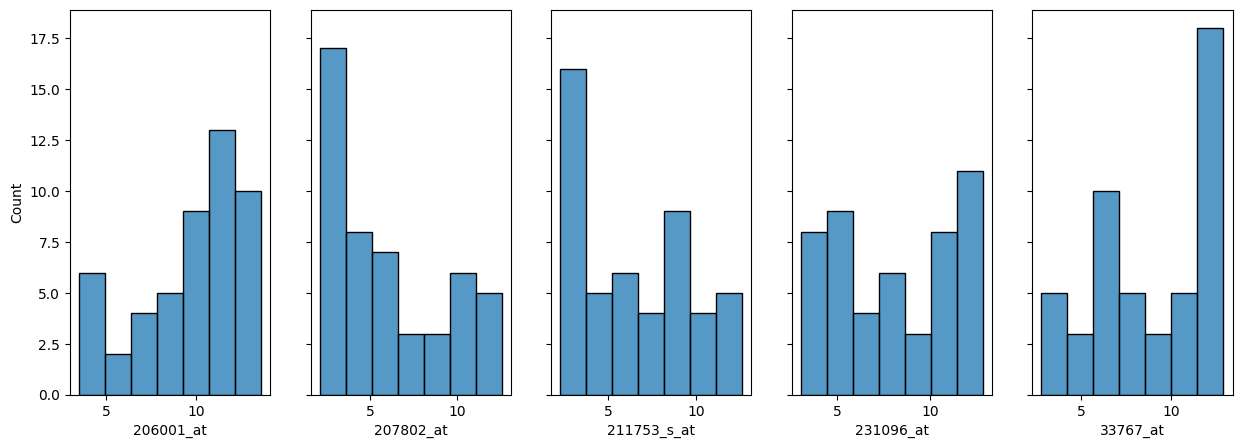

In [29]:
high_sted_list = sted_df_melt[sted_df_melt['value'] > 3][
    'variable'
].to_list()

def plot_(df:pd.DataFrame):
    df2 = df.copy()

    if 'type' in df2.columns.to_list():
        df2 = df2.drop('type', axis=1)

    f, ax = plt.subplots(1, len(df2.columns.to_list()), figsize=(15,5), sharey=True)
    for i, col in enumerate(df2.columns):
        ax[i] = sns.histplot(df2[col], ax=ax[i])

    plt.show()

plot_(main[['type'] + high_sted_list])

# plot_(main[main['type']=='tumoral'][high_sted_list])
# plot_(main[main['type']=='normal'][high_sted_list])

In [30]:
import scipy.stats as st

In [31]:
test.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,tumoral,8.767514,4.092134,6.006339,6.091951,2.738641,7.707960,6.702969,5.203349,8.576258,...,13.852908,13.854510,14.953006,14.824910,3.710845,2.493435,2.913242,2.360155,2.758725,2.779035
1,tumoral,9.177852,5.688045,5.599253,5.943833,2.667376,6.737484,7.336429,6.246692,4.318309,...,13.784316,13.776588,14.944678,14.798245,3.840439,2.452855,2.657462,2.480106,2.811486,3.098742
2,tumoral,8.415823,4.579540,5.562391,6.185697,2.747484,6.961582,6.809795,7.158062,3.136874,...,13.833406,13.853554,14.929317,14.749283,3.960969,2.593110,2.839218,2.483863,2.939876,2.761388
3,tumoral,8.943121,6.577537,5.850425,5.846352,2.429107,6.492797,7.594337,6.060994,4.734763,...,13.601130,13.604113,14.927910,14.753407,3.821295,2.629036,2.798198,2.487149,2.652175,2.600322
4,tumoral,8.658734,4.624722,6.882949,5.880421,2.517857,7.519646,6.840436,6.290670,5.573977,...,13.961861,13.933318,14.994563,14.803339,3.990229,2.862215,2.766505,2.229823,2.630706,2.588111


In [32]:
main[limited_probes].drop(
    'samples', axis=1
).head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at
0,tumoral,8.767514,4.092134,6.006339,6.091951,2.738641,7.707960,6.702969,5.203349
1,tumoral,9.177852,5.688045,5.599253,5.943833,2.667376,6.737484,7.336429,6.246692
2,tumoral,8.415823,4.579540,5.562391,6.185697,2.747484,6.961582,6.809795,7.158062
3,tumoral,8.943121,6.577537,5.850425,5.846352,2.429107,6.492797,7.594337,6.060994
4,tumoral,8.658734,4.624722,6.882949,5.880421,2.517857,7.519646,6.840436,6.290670


In [33]:
calculate_difference(main[limited_probes].drop('samples', axis=1
).groupby('type').agg('mean').reset_index())

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at
0,normal,8.708066,4.693110,6.005189,5.955509,2.681096,8.227662,6.559012,6.228866
1,tumoral,8.721844,4.913984,5.961145,5.963773,2.722313,7.458128,7.006784,6.137731
0,difference,-0.013777,-0.220874,0.044044,-0.008264,-0.041217,0.769534,-0.447772,0.091136


In [34]:
main[limited_probes].head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at
0,136,tumoral,8.767514,4.092134,6.006339,6.091951,2.738641,7.707960,6.702969,5.203349
1,137,tumoral,9.177852,5.688045,5.599253,5.943833,2.667376,6.737484,7.336429,6.246692
2,138,tumoral,8.415823,4.579540,5.562391,6.185697,2.747484,6.961582,6.809795,7.158062
3,139,tumoral,8.943121,6.577537,5.850425,5.846352,2.429107,6.492797,7.594337,6.060994
4,141,tumoral,8.658734,4.624722,6.882949,5.880421,2.517857,7.519646,6.840436,6.290670


In [398]:
df_cancer = test3[test3['type']=='tumoral'].fillna(0)
df_normal = test3[test3['type']=='normal'].fillna(0)

In [399]:
df_cancer.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,136,tumoral,0.210428,-1.258162,0.318639,0.674490,0.318639,-0.157311,-0.157311,-1.731664,...,-0.488776,-0.374095,-0.430727,0.674490,-0.548522,-0.488776,0.741594,0.157311,0.318639,0.052245
1,137,tumoral,1.150349,1.382994,-0.488776,0.104633,-0.430727,-1.258162,1.054472,0.104633,...,-1.258162,-1.258162,-0.674490,-0.318639,0.318639,-0.610295,-0.610295,0.741594,0.741594,1.258162
2,138,tumoral,-0.674490,-0.430727,-0.741594,0.967422,0.430727,-1.054472,0.104633,2.036834,...,-0.741594,-0.430727,-1.534121,-1.382994,0.548522,0.000000,0.264147,0.812218,1.150349,-0.052245
3,139,tumoral,0.548522,0.000000,0.052245,-0.264147,-1.731664,-1.534121,1.382994,-0.210428,...,0.000000,0.000000,-1.731664,-1.258162,0.210428,0.210428,0.052245,0.967422,-0.264147,-0.967422
4,141,tumoral,-0.210428,-0.374095,1.534121,-0.104633,-1.150349,-0.318639,0.157311,0.210428,...,0.430727,0.104633,0.887147,0.026114,0.741594,1.150349,-0.104633,-0.741594,-0.548522,-1.150349


In [400]:
p_sig = 0.05
differential_expressed_genes = []
for col in df_cancer.columns[2:]:
    t, pvalue= st.ttest_ind(df_cancer[col],df_normal[col], equal_var = False, alternative = 'two-sided')
    if pvalue < p_sig:
        differential_expressed_genes.append(str(col))
differential_expressed_genes

['1294_at',
 '1316_at',
 '1431_at',
 '1438_at',
 '1487_at',
 '1552256_a_at',
 '1552257_a_at',
 '1552258_at',
 '1552263_at',
 '1552264_a_at',
 '1552271_at',
 '1552272_a_at',
 '1552276_a_at',
 '1552279_a_at',
 '1552283_s_at',
 '1552287_s_at',
 '1552289_a_at',
 '1552291_at',
 '1552295_a_at',
 '1552302_at',
 '1552307_a_at',
 '1552322_at',
 '1552327_at',
 '1552332_at',
 '1552334_at',
 '1552338_at',
 '1552348_at',
 '1552355_s_at',
 '1552364_s_at',
 '1552367_a_at',
 '1552378_s_at',
 '1552383_at',
 '1552388_at',
 '1552391_at',
 '1552393_at',
 '1552396_at',
 '1552401_a_at',
 '1552410_at',
 '1552411_at',
 '1552418_at',
 '1552419_s_at',
 '1552421_a_at',
 '1552427_at',
 '1552449_a_at',
 '1552452_at',
 '1552453_a_at',
 '1552459_a_at',
 '1552463_at',
 '1552467_at',
 '1552477_a_at',
 '1552478_a_at',
 '1552480_s_at',
 '1552484_at',
 '1552485_at',
 '1552486_s_at',
 '1552490_at',
 '1552491_at',
 '1552493_s_at',
 '1552502_s_at',
 '1552507_at',
 '1552510_at',
 '1552511_a_at',
 '1552524_at',
 '1552528_at',

In [221]:
print(len(main.columns.tolist())), print(len(differential_expressed_genes))


54677
19094


(None, None)

In [37]:
len(differential_expressed_genes)

19094

In [404]:
filtered_for_p = test3[['samples', 'type'] + differential_expressed_genes].fillna(0)
filtered_for_p.head()

,samples,type,1294_at,1316_at,1431_at,1438_at,1487_at,1552256_a_at,1552257_a_at,1552258_at,...,AFFX-M27830_M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-5_at
0,136,tumoral,-0.157311,-0.157311,-0.610295,-0.741594,-0.488776,1.382994,-0.674490,1.150349,...,-0.052245,0.488776,0.000000,-0.104633,-0.264147,-0.264147,-0.104633,-0.488776,-0.374095,0.674490
1,137,tumoral,-1.258162,1.054472,-0.548522,0.967422,0.000000,2.036834,1.534121,-1.054472,...,-0.488776,0.374095,-0.812218,-0.674490,-0.967422,-0.967422,-0.887147,-1.258162,-1.258162,-0.318639
2,138,tumoral,-1.054472,0.104633,1.150349,0.000000,0.548522,1.054472,1.150349,0.000000,...,0.548522,0.052245,-1.258162,-1.054472,-0.887147,-0.887147,-0.812218,-0.741594,-0.430727,-1.382994
3,139,tumoral,-1.534121,1.382994,-1.258162,-0.104633,1.258162,0.488776,0.741594,-0.674490,...,0.318639,-0.812218,0.000000,0.000000,0.000000,0.000000,-2.036834,0.000000,0.000000,-1.258162
4,141,tumoral,-0.318639,0.157311,0.318639,-0.967422,0.210428,-0.052245,-1.258162,-1.258162,...,-0.318639,0.430727,-0.052245,0.052245,-0.210428,0.052245,0.000000,0.430727,0.104633,0.026114


In [405]:
r_values = test3[differential_expressed_genes].corr()

In [30]:
list_correlated_genes = []

for index, row in r_values.iterrows():
    for col, value in row.items():

        if (value > 0.95) & (col != index):
            list_correlated_genes.append([col, value, index])

In [406]:

def find_correlated_genes_optimized(r_values, threshold=0.95):
    correlated_genes_list = []

    # Create a mask for values above the threshold
    mask = (r_values.to_numpy() > threshold) & (r_values.index.to_numpy() != r_values.columns.to_numpy()[:, None])

    # Extract the column and index names where the mask is True
    correlated_columns, correlated_rows = np.where(mask)

    for col, index in zip(r_values.columns[correlated_columns], r_values.index[correlated_rows]):
        value = r_values.at[index, col]
        correlated_genes_list.append([col, value, index])

    return correlated_genes_list



In [407]:
result = find_correlated_genes_optimized(r_values)

In [408]:
high_r_value_columns = []
included_columns = []

for col in result:
    if col not in included_columns:
        high_r_value_columns.append(col[0])
        included_columns.append(col[2])

In [409]:
print(high_r_value_columns), print(included_columns)

['1552257_a_at', '1553569_at', '1553570_x_at', '1553972_a_at', '1554556_a_at', '1554997_a_at', '1555416_a_at', '1555993_at', '1556181_at', '1556182_x_at', '1557965_at', '1557966_x_at', '1559950_at', '1559952_x_at', '1560369_at', '1560370_x_at', '1564063_a_at', '1566557_at', '1566558_x_at', '200025_s_at', '200074_s_at', '200088_x_at', '200088_x_at', '200631_s_at', '200809_x_at', '200817_x_at', '200823_x_at', '200966_x_at', '201030_x_at', '201033_x_at', '201070_x_at', '201103_x_at', '201154_x_at', '201217_x_at', '201217_x_at', '201243_s_at', '201255_x_at', '201293_x_at', '201293_x_at', '201293_x_at', '201293_x_at', '201590_x_at', '201590_x_at', '201621_at', '201681_s_at', '201752_s_at', '201760_s_at', '201852_x_at', '202028_s_at', '202428_x_at', '202428_x_at', '202648_at', '202648_at', '202649_x_at', '202649_x_at', '203107_x_at', '203107_x_at', '203242_s_at', '203243_s_at', '203462_x_at', '204319_s_at', '204326_x_at', '204326_x_at', '204393_s_at', '204412_s_at', '204418_x_at', '204418_x_

(None, None)

In [410]:
new_list = []

for col in differential_expressed_genes:
    if (col not in high_r_value_columns):
        new_list.append(col)

In [411]:
print(len(main.columns)), print(len(differential_expressed_genes)), print(len(high_r_value_columns)), print(len(new_list))

54677
17788
482
17477


(None, None, None, None)

In [414]:
filtered_for_p = test3[['type', 'samples'] + new_list].fillna(0)
filtered_for_p.head()

,type,samples,1294_at,1316_at,1431_at,1438_at,1487_at,1552256_a_at,1552258_at,1552263_at,...,AFFX-CreX-3_at,AFFX-DapX-3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_M_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-P1-cre-5_at
0,tumoral,136,-0.157311,-0.157311,-0.610295,-0.741594,-0.488776,1.382994,1.150349,0.610295,...,-0.430727,-0.488776,0.741594,0.264147,0.812218,1.150349,0.052245,-0.052245,0.488776,0.674490
1,tumoral,137,-1.258162,1.054472,-0.548522,0.967422,0.000000,2.036834,-1.054472,0.291285,...,-0.610295,-0.812218,0.488776,-0.430727,-0.488776,-0.610295,-1.054472,-0.488776,0.374095,-0.318639
2,tumoral,138,-1.054472,0.104633,1.150349,0.000000,0.548522,1.054472,0.000000,-0.318639,...,-1.258162,-0.548522,-1.382994,0.812218,0.374095,0.741594,0.430727,0.548522,0.052245,-1.382994
3,tumoral,139,-1.534121,1.382994,-1.258162,-0.104633,1.258162,0.488776,-0.674490,1.150349,...,-1.731664,-0.104633,-0.548522,-0.052245,-0.812218,-0.887147,-0.488776,0.318639,-0.812218,-1.258162
4,tumoral,141,-0.318639,0.157311,0.318639,-0.967422,0.210428,-0.052245,-1.258162,-0.610295,...,-1.534121,-0.318639,-0.157311,0.318639,1.382994,0.548522,0.548522,-0.318639,0.430727,0.026114


In [415]:
filtered_for_p['type'].value_counts()

type
tumoral    35
normal     14
Name: count, dtype: int64

In [416]:
y = filtered_for_p['type']
X = filtered_for_p.drop(['type', 'samples'], axis=1)

In [417]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1337)

In [418]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
display(pd.concat([X_train_under,y_train_under],axis=1))

,1294_at,1316_at,1431_at,1438_at,1487_at,1552256_a_at,1552258_at,1552263_at,1552264_a_at,1552271_at,...,AFFX-DapX-3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_M_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-P1-cre-5_at,type
43,0.674490,0.374095,0.157311,-0.812218,-1.258162,-0.741594,0.674490,-1.054472,-0.887147,-0.318639,...,-1.150349,1.534121,0.887147,-0.887147,-0.741594,2.036834,-1.258162,-1.054472,1.150349,normal
38,2.036834,0.210428,0.674490,-0.157311,0.318639,0.052245,2.036834,-1.382994,-1.054472,-0.104633,...,-0.052245,1.054472,-0.374095,0.318639,1.382994,-0.157311,0.104633,0.812218,0.264147,normal
41,0.887147,-0.967422,-0.812218,-1.054472,0.000000,-0.674490,-1.382994,-0.674490,-0.104633,-1.054472,...,0.548522,0.548522,0.610295,-0.967422,-1.150349,1.150349,-0.741594,0.000000,0.967422,normal
37,1.534121,-0.610295,0.741594,1.731664,0.610295,0.104633,1.731664,1.382994,-0.210428,1.054472,...,0.264147,0.318639,1.150349,1.258162,1.258162,1.382994,0.000000,0.674490,0.374095,normal
48,0.741594,-0.430727,-0.104633,-2.036834,-0.157311,0.000000,0.374095,-0.104633,-2.036834,-2.036834,...,-1.731664,-0.674490,0.430727,-1.731664,-2.036834,1.534121,-1.054472,-0.488776,0.000000,normal
42,0.374095,-0.264147,-0.488776,-1.150349,-1.731664,-0.967422,0.548522,-1.534121,-0.374095,-0.741594,...,0.000000,1.150349,0.967422,-1.258162,-1.258162,1.731664,-0.887147,0.210428,1.731664,normal
45,0.488776,-1.534121,1.731664,-1.258162,-1.054472,-1.150349,1.258162,-0.264147,-0.610295,-0.374095,...,-0.374095,-0.967422,0.000000,-0.318639,-0.812218,0.000000,-1.150349,0.548522,1.054472,normal
39,0.000000,0.000000,0.210428,0.000000,-1.382994,-1.258162,1.054472,0.674490,0.210428,-1.534121,...,-0.887147,0.967422,2.036834,-1.534121,-1.731664,0.374095,0.000000,-1.534121,1.534121,normal
40,1.054472,-0.812218,0.104633,-1.534121,-1.150349,-2.036834,0.967422,-0.967422,-1.731664,-1.731664,...,-1.534121,0.374095,0.674490,-1.382994,-1.534121,0.741594,-1.382994,-0.237202,0.741594,normal
17,-0.674490,-0.104633,-1.054472,-0.318639,-0.374095,0.000000,-0.052245,0.887147,1.534121,0.318639,...,0.210428,2.036834,0.000000,-0.104633,0.052245,-0.374095,1.382994,0.000000,0.318639,tumoral


In [419]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=0, solver='lbfgs')
classification.fit(X_train_under, y_train_under)

LogisticRegression(random_state=0)

In [420]:
y_pred = classification.predict(X=X_test)
print(y_pred)

['tumoral' 'tumoral' 'normal' 'tumoral' 'tumoral' 'tumoral' 'tumoral'
 'tumoral' 'tumoral' 'tumoral' 'tumoral' 'normal' 'tumoral' 'tumoral'
 'tumoral' 'tumoral' 'normal' 'normal' 'tumoral' 'tumoral']


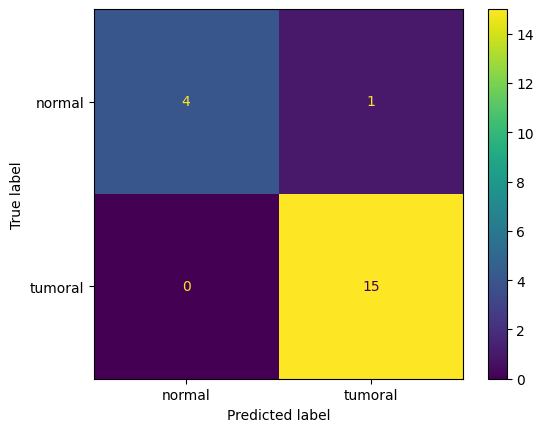

In [421]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_)
disp.plot()

plt.show()

In [422]:
filtered_for_p[new_list].head()
X.head()

,1294_at,1316_at,1431_at,1438_at,1487_at,1552256_a_at,1552258_at,1552263_at,1552264_a_at,1552271_at,...,AFFX-CreX-3_at,AFFX-DapX-3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_M_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-P1-cre-5_at
0,-0.157311,-0.157311,-0.610295,-0.741594,-0.488776,1.382994,1.150349,0.610295,-1.382994,-1.258162,...,-0.430727,-0.488776,0.741594,0.264147,0.812218,1.150349,0.052245,-0.052245,0.488776,0.674490
1,-1.258162,1.054472,-0.548522,0.967422,0.000000,2.036834,-1.054472,0.291285,1.054472,-1.382994,...,-0.610295,-0.812218,0.488776,-0.430727,-0.488776,-0.610295,-1.054472,-0.488776,0.374095,-0.318639
2,-1.054472,0.104633,1.150349,0.000000,0.548522,1.054472,0.000000,-0.318639,1.382994,1.258162,...,-1.258162,-0.548522,-1.382994,0.812218,0.374095,0.741594,0.430727,0.548522,0.052245,-1.382994
3,-1.534121,1.382994,-1.258162,-0.104633,1.258162,0.488776,-0.674490,1.150349,0.887147,-0.548522,...,-1.731664,-0.104633,-0.548522,-0.052245,-0.812218,-0.887147,-0.488776,0.318639,-0.812218,-1.258162
4,-0.318639,0.157311,0.318639,-0.967422,0.210428,-0.052245,-1.258162,-0.610295,0.318639,-0.157311,...,-1.534121,-0.318639,-0.157311,0.318639,1.382994,0.548522,0.548522,-0.318639,0.430727,0.026114


In [423]:
print(filtered_for_p[new_list].shape)
print(filtered_for_p[['type']].shape)

(49, 17477)
(49, 1)


In [424]:
y_pred2 = classification.predict(X=filtered_for_p[new_list])
print(y_pred)

y_real = filtered_for_p['type']

['tumoral' 'tumoral' 'normal' 'tumoral' 'tumoral' 'tumoral' 'tumoral'
 'tumoral' 'tumoral' 'tumoral' 'tumoral' 'normal' 'tumoral' 'tumoral'
 'tumoral' 'tumoral' 'normal' 'normal' 'tumoral' 'tumoral']


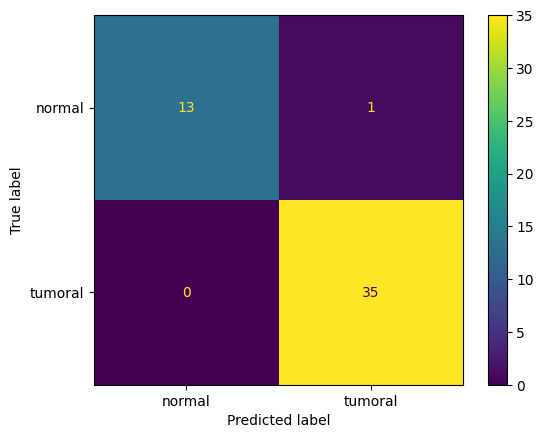

In [425]:
cm_test = confusion_matrix(y_real, y_pred2)

disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_)
disp.plot()

plt.show()

In [445]:
GSE26910 = pd.read_csv('./Raw/Prostate_GSE55945.csv')
GSE26910.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,933,tumoral,10.018234,7.707583,5.989747,5.829840,2.494476,8.939803,4.962801,4.856077,...,13.521793,13.492930,14.515047,14.346766,2.987548,2.427671,2.238646,2.156191,2.562932,2.855860
1,934,tumoral,9.917901,7.140408,5.269716,5.894167,2.493712,7.013469,5.037927,5.783995,...,13.508332,13.606260,14.558157,14.404023,3.116301,2.732446,2.535558,2.249507,2.575246,2.541969
2,935,tumoral,10.030899,7.009126,4.838489,5.734018,2.712703,8.360789,5.013073,5.070055,...,13.896166,13.905449,14.623102,14.468804,3.231902,2.652717,2.598874,2.182475,2.677108,2.756087
3,936,tumoral,10.267389,7.238755,6.202870,5.868314,2.468433,8.668240,5.093923,4.842425,...,13.553855,13.570597,14.498986,14.352804,3.234453,2.562404,2.614932,2.359522,2.391233,2.503232
4,938,tumoral,10.274597,7.408846,5.791614,5.702898,2.335951,8.075089,4.653027,5.377589,...,13.371034,13.495509,14.518759,14.327416,3.053767,2.570960,2.588031,2.247985,2.536752,2.604973


In [446]:
#df_genes = df.drop([‘samples’, ‘type’], axis = 1)
df_transformed2 = GSE26910.copy()

# # apply quantile transformation to data
# from sklearn.preprocessing import QuantileTransformer
# qt = QuantileTransformer (output_distribution ='normal')
# qt.fit(GSE26910[GSE26910.columns[2:]])
df_transformed2[GSE26910.columns[2:]] = qt.transform(GSE26910[GSE26910.columns[2:]])

In [447]:
GSE26910_filtered = df_transformed2[['samples', 'type'] + new_list]
GSE26910_filtered.head()

,samples,type,1294_at,1316_at,1431_at,1438_at,1487_at,1552256_a_at,1552258_at,1552263_at,...,AFFX-CreX-3_at,AFFX-DapX-3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_M_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-P1-cre-5_at
0,933,tumoral,3.357037,-5.199338,1.812405,-0.582579,5.199338,5.199338,-5.199338,1.336666,...,-5.199338,-0.560256,-0.054326,-0.189469,-5.199338,-5.199338,-5.199338,-5.199338,1.079737,-5.199338
1,934,tumoral,-0.908255,-5.199338,5.199338,-1.757662,5.199338,5.199338,-5.199338,2.056116,...,-5.199338,0.012433,-2.583178,-0.153362,-5.199338,-5.199338,-5.199338,-5.199338,-0.603914,-5.199338
2,935,tumoral,1.155008,-5.199338,2.078301,-1.698751,1.101669,2.143728,-5.199338,-0.409486,...,-5.199338,-0.302225,-1.745284,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.292340,-5.199338
3,936,tumoral,1.574872,-5.199338,1.264630,-1.151706,5.199338,2.233419,-0.809215,0.489669,...,-5.199338,-0.074626,0.473525,-0.300373,-5.199338,-5.199338,-5.199338,-5.199338,-1.469561,-5.199338
4,938,tumoral,0.748206,-5.199338,2.298843,0.378496,5.199338,5.199338,-0.434139,2.447804,...,-5.199338,-0.529154,-1.651745,1.208390,-5.199338,-5.199338,-5.199338,-5.199338,0.301521,-5.199338


In [448]:
y = GSE26910_filtered['type']
X = GSE26910_filtered.drop(['samples', 'type'], axis=1)

In [449]:
y_pred3 = classification.predict(X=X)

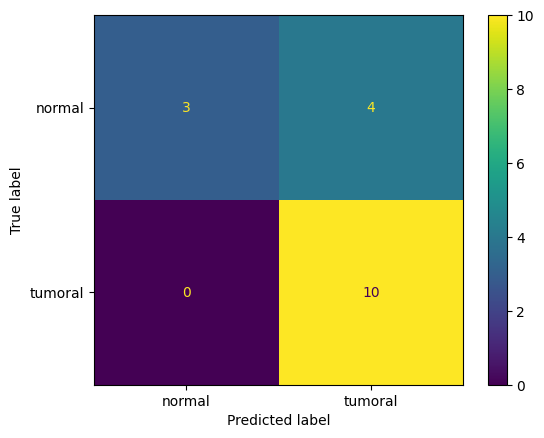

In [450]:
cm_test = confusion_matrix(y, y_pred3)

disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_)
disp.plot()

plt.show()